# Example PV curve
The purpose of this document is to showcase how a Q-V hysteresis loop can be transformed to a P-E hysteresis loop, as shown in the paper

In [1]:
import pair_conformal as pair_conformal
import infinite_fourier as infinite_fourier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tqdm
import scipy.optimize

In [2]:
# IDE geometry
t = 0.230 # film thickness, µm
b = 3.5526128590971275 # electrode width, µm
a = 10-b # electrode spacing, µm
N = 100 # number of fingers
L = 900 # finger overlap lenght, µm
eps_air = 1
eps_sub = 317 # relative dielectric constant of substrate [-]
eps_0 = 8.8541878128*10**-12 # dielectric permitivity of vacuum [F/m]
eta = b/(a+b) # cover fraction
tau = t/(a+b) # normalized thickness

In [3]:
# charge in [µC]
Q = [-0.002387185, -0.002369244, -0.002349509, -0.002327839, -0.00230595, -0.002283729, -0.002259291, -0.00223318, -0.002207021, -0.00217887, -0.002148065, -0.002116512, -0.002082226, -0.002045068, -0.002007333, -0.001967078, -0.001924073, -0.00187983, -0.001831545, -0.001776912, -0.001717819, -0.001652946, -0.00158003, -0.001499078, -0.001407161, -0.001296693, -0.001157247, -0.0009688821, -0.0007027968, -0.0003493804, 6.637685E-05, 0.0005045007, 0.0009297, 0.001327835, 0.001694989, 0.002024981, 0.002312988, 0.002544892, 0.002708135, 0.002813413, 0.002884158, 0.002935813, 0.002977405, 0.003014872, 0.003051124, 0.003085805, 0.003118195, 0.003150051, 0.003181595, 0.003211494, 0.003240727, 0.003271036, 0.003300532, 0.003329036, 0.003358051, 0.003386047, 0.003412343, 0.00343873, 0.003465813, 0.003491773, 0.003516818, 0.003542413, 0.003568233, 0.003592727, 0.003616624, 0.003641341, 0.003665666, 0.003689383, 0.00371402, 0.003738411, 0.003761646, 0.00378567, 0.00380854, 0.003830412, 0.003853858, 0.003876645, 0.00389871, 0.00392127, 0.0039428, 0.003964474, 0.003987001, 0.00400799, 0.004029234, 0.004051416, 0.004072585, 0.004094301, 0.004115343, 0.004136069, 0.004156884, 0.004176097, 0.004197029, 0.004218405, 0.004238687, 0.004260382, 0.004282224, 0.004302702, 0.004322752, 0.004343851, 0.004364848, 0.004384621, 0.004389469, 0.00437785, 0.00436301, 0.004347459, 0.004332854, 0.004317561, 0.004301789, 0.004286926, 0.004271545, 0.004255491, 0.004240051, 0.004224759, 0.00420843, 0.004191772, 0.004176366, 0.00416125, 0.004145099, 0.004128415, 0.004112476, 0.004096543, 0.004079259, 0.004062261, 0.004046589, 0.004030942, 0.004014314, 0.003997051, 0.003980191, 0.003963542, 0.003946654, 0.00392912, 0.003911167, 0.003893725, 0.00387713, 0.003860145, 0.003841765, 0.003823862, 0.003806447, 0.003788375, 0.003769961, 0.003752647, 0.003735448, 0.003717227, 0.003700021, 0.003682116, 0.003662905, 0.003644769, 0.003627122, 0.00360835, 0.003589583, 0.00357172, 0.003552353, 0.003532552, 0.003514034, 0.003494644, 0.003474555, 0.003455356, 0.003436633, 0.003416994, 0.003396764, 0.0033774, 0.003356971, 0.003335312, 0.003315078, 0.00329518, 0.003274194, 0.003253128, 0.003232777, 0.003211828, 0.003189375, 0.003167216, 0.003146184, 0.00312443, 0.00310179, 0.003080117, 0.00305787, 0.003034205, 0.003011555, 0.002989346, 0.002965535, 0.002941398, 0.002918004, 0.00289363, 0.002868321, 0.002843333, 0.002818347, 0.002792202, 0.002766602, 0.002741391, 0.002714635, 0.002687873, 0.002660486, 0.002632803, 0.00260405, 0.002574675, 0.002545929, 0.002515959, 0.002486143, 0.002455284, 0.00242318, 0.002390967, 0.002356995, 0.002322765, 0.002287607, 0.002251305, 0.002215339, 0.002176916, 0.002137335, 0.002096899, 0.002053197, 0.002008466, 0.001963086, 0.001914314, 0.001864452, 0.001813566, 0.001757648, 0.001698819, 0.001635419, 0.001566245, 0.001493, 0.00141098, 0.001318391, 0.001211927, 0.00108212, 0.0009163766, 0.000690813, 0.0003883601, 1.692951E-05, -0.000392243, -0.0007981218, -0.001181059, -0.001535184, -0.001858449, -0.002146879, -0.002386551, -0.002571249, -0.002703419, -0.002794477, -0.002861993, -0.00291466, -0.002959006, -0.002999532, -0.003036268, -0.003071271, -0.0031041, -0.003136221, -0.00316746, -0.003198189, -0.003228038, -0.003256713, -0.003284778, -0.003312415, -0.003340448, -0.003366892, -0.003393282, -0.003418866, -0.003444512, -0.003470579, -0.003495327, -0.003520311, -0.003543997, -0.003567151, -0.003590962, -0.003613797, -0.003637049, -0.003659737, -0.003682343, -0.003704853, -0.003727164, -0.003749261, -0.00377138, -0.003793217, -0.003815038, -0.003836964, -0.003857836, -0.003879352, -0.003900119, -0.003921316, -0.003942682, -0.003962902, -0.003984258, -0.004005409, -0.004026261, -0.004047064, -0.004066859, -0.004086888, -0.004106357, -0.004126163, -0.004146, -0.004166117, -0.004186207, -0.004205392, -0.004225425, -0.004244706, -0.004263909, -0.004284097, -0.004303301, -0.004322754, -0.004342262, -0.004361021, -0.004380661, -0.004384621, -0.004372234, -0.004358755, -0.004344455, -0.00433072, -0.004316052, -0.004300078, -0.004284856, -0.00426906, -0.004253508, -0.00423859, -0.004222432, -0.004207311, -0.004192688, -0.004176455, -0.004160648, -0.004145491, -0.004128887, -0.004113142, -0.00409762, -0.004080968, -0.004065461, -0.004049503, -0.004032505, -0.004016477, -0.004000217, -0.003983392, -0.003967661, -0.003951622, -0.003934831, -0.003918328, -0.003901679, -0.003884285, -0.003867609, -0.003851268, -0.003833688, -0.003816898, -0.00380087, -0.003783329, -0.003765523, -0.003748579, -0.003730843, -0.003713503, -0.003696942, -0.003679079, -0.003661704, -0.003644798, -0.003626271, -0.003607254, -0.003589577, -0.003571913, -0.003553253, -0.003535882, -0.003518591, -0.003499268, -0.003479955, -0.003461624, -0.003442215, -0.003422801, -0.003404754, -0.003385643, -0.003366159, -0.003347591, -0.003328024, -0.003307475, -0.003288023, -0.003269004, -0.003248631, -0.003228407, -0.003209213, -0.003188924, -0.003167785, -0.003147349, -0.003126381, -0.003104725, -0.003084507, -0.003064405, -0.003042441, -0.003020605, -0.002998852, -0.002975501, -0.00295198, -0.002929463, -0.00290585, -0.002882403, -0.002859337, -0.002834672, -0.00281071, -0.002785981, -0.002760758, -0.002736262, -0.002710309, -0.002684624, -0.002659622, -0.002632805, -0.002605139, -0.002578091, -0.002550153, -0.002521417, -0.002493659, -0.002476145]
# potential in [V]
V = [0.04437793, 0.1739239, 0.2942994, 0.4361776, 0.5788627, 0.7110827, 0.8366968, 0.9845453, 1.117674, 1.243658, 1.387886, 1.532312, 1.646195, 1.802599, 1.932895, 2.052276, 2.199362, 2.343338, 2.461306, 2.60569, 2.752447, 2.871715, 3.013873, 3.157966, 3.280472, 3.412226, 3.563019, 3.692115, 3.812608, 3.970434, 4.090213, 4.22052, 4.3725, 4.489566, 4.643403, 4.778002, 4.898654, 5.04967, 5.196358, 5.317157, 5.449754, 5.593945, 5.732201, 5.865779, 5.994799, 6.144366, 6.277221, 6.401462, 6.539872, 6.688802, 6.810711, 6.945728, 7.098175, 7.219552, 7.351885, 7.499124, 7.632737, 7.759171, 7.896377, 8.041049, 8.173279, 8.299081, 8.447179, 8.586698, 8.708143, 8.841791, 8.989992, 9.126638, 9.250328, 9.403575, 9.52848, 9.654918, 9.808635, 9.931167, 10.06538, 10.21923, 10.33743, 10.47862, 10.62457, 10.7402, 10.8833, 11.03156, 11.14934, 11.29342, 11.43369, 11.55816, 11.71303, 11.82484, 11.97619, 12.10787, 12.22994, 12.38982, 12.51661, 12.64386, 12.78661, 12.93372, 13.05551, 13.18304, 13.33218, 13.47126, 13.47057, 13.34165, 13.21203, 13.0657, 12.93242, 12.81065, 12.65633, 12.52214, 12.40226, 12.25602, 12.11738, 11.98418, 11.8587, 11.71189, 11.56643, 11.44239, 11.31596, 11.1702, 11.02897, 10.9072, 10.77088, 10.62157, 10.48739, 10.35589, 10.22745, 10.08808, 9.944459, 9.810282, 9.676345, 9.547437, 9.407411, 9.264067, 9.128718, 9.006959, 8.871855, 8.722055, 8.585446, 8.458357, 8.321081, 8.176833, 8.058867, 7.916413, 7.772325, 7.65478, 7.506218, 7.362387, 7.234265, 7.107719, 6.960752, 6.828286, 6.703134, 6.548166, 6.416759, 6.294292, 6.149382, 6.007489, 5.880206, 5.751837, 5.606753, 5.463816, 5.343571, 5.197211, 5.054191, 4.93077, 4.800648, 4.653707, 4.517845, 4.393469, 4.256721, 4.105326, 3.978059, 3.85098, 3.705955, 3.565578, 3.445307, 3.299403, 3.153569, 3.03095, 2.90015, 2.7503, 2.617978, 2.494177, 2.356169, 2.20776, 2.080731, 1.946691, 1.796866, 1.67866, 1.538039, 1.400089, 1.275009, 1.120759, 1.007585, 0.8491522, 0.7261425, 0.5891596, 0.4411228, 0.3306482, 0.172344, 0.04901001, -0.09255664, -0.2328214, -0.3526073, -0.5034429, -0.6367069, -0.7543792, -0.9117505, -1.035949, -1.170603, -1.326794, -1.441486, -1.573293, -1.729042, -1.848447, -1.980201, -2.137717, -2.246692, -2.402132, -2.534279, -2.65746, -2.81039, -2.930528, -3.068533, -3.212284, -3.334133, -3.485053, -3.603587, -3.74382, -3.889321, -4.005676, -4.159727, -4.286889, -4.427423, -4.575235, -4.691462, -4.843907, -4.97285, -5.10098, -5.254734, -5.36598, -5.526317, -5.650281, -5.787211, -5.934189, -6.050872, -6.204697, -6.323915, -6.477433, -6.594819, -6.752144, -6.865386, -7.01591, -7.147833, -7.274442, -7.425538, -7.542306, -7.697025, -7.829558, -7.955273, -8.108235, -8.217963, -8.370495, -8.502801, -8.631045, -8.784983, -8.899929, -9.058136, -9.170603, -9.326056, -9.439473, -9.599152, -9.713706, -9.874289, -9.988198, -10.13291, -10.2771, -10.3928, -10.54458, -10.67271, -10.79995, -10.95884, -11.07297, -11.2276, -11.34653, -11.4879, -11.62453, -11.75633, -11.89593, -12.02081, -12.17913, -12.297, -12.43557, -12.58356, -12.69842, -12.84797, -12.99229, -13.10664, -13.26098, -13.38555, -13.52003, -13.54577, -13.39104, -13.27562, -13.12593, -12.99292, -12.86961, -12.71928, -12.57959, -12.46102, -12.30327, -12.18371, -12.05147, -11.89865, -11.78261, -11.64637, -11.49334, -11.36798, -11.23715, -11.08353, -10.97168, -10.82847, -10.68037, -10.56139, -10.41533, -10.27377, -10.15177, -10.00852, -9.867024, -9.747101, -9.605703, -9.460669, -9.33259, -9.19675, -9.043613, -8.926188, -8.793416, -8.643863, -8.51504, -8.393796, -8.240279, -8.103074, -7.981934, -7.82956, -7.704981, -7.576974, -7.419369, -7.29804, -7.167288, -7.022652, -6.875559, -6.758023, -6.619517, -6.473402, -6.350123, -6.221588, -6.066411, -5.931273, -5.812472, -5.659986, -5.526576, -5.405522, -5.256872, -5.117758, -4.996664, -4.854961, -4.706422, -4.588032, -4.455454, -4.308749, -4.169603, -4.045834, -3.900617, -3.759233, -3.637866, -3.498157, -3.352002, -3.232586, -3.096836, -2.94648, -2.819279, -2.686219, -2.541309, -2.404865, -2.279498, -2.126449, -2.010972, -1.869708, -1.72437, -1.607475, -1.450987, -1.32675, -1.196558, -1.045765, -0.9183388, -0.7919357, -0.6417174, -0.504509, -0.3828973, -0.237842, -0.09474963, -0.04021149]


Text(0.5, 0, '$V$ [V]')

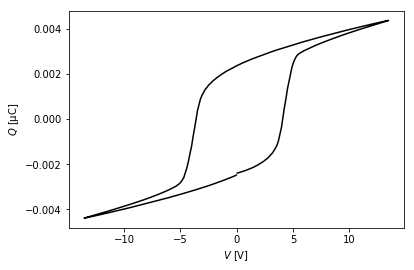

In [4]:
# plot Q-V curve
fig,ax=plt.subplots()
ax.plot(V,Q,'k')
ax.set_ylabel(r'$Q$ [µC]')
ax.set_xlabel(r'$V$ [V]')

In order to subtract the dielectric contribution from the substrate and air, the dielectric constant of the film should be known as a function of the field applied to the electrodes.
We follow the aproach of the 'Example_CV_curve' notebook, and make the function V_to_eps()

In [5]:
# capacitance in [F]
C=[1.428721E-10, 1.429671E-10, 1.456579E-10, 1.42468E-10, 1.460786E-10, 1.446451E-10, 1.461049E-10, 1.431395E-10, 1.463592E-10, 1.439421E-10, 1.471552E-10, 1.459837E-10, 1.470516E-10, 1.472527E-10, 1.468963E-10, 1.45112E-10, 1.470788E-10, 1.498311E-10, 1.475891E-10, 1.488992E-10, 1.482823E-10, 1.490999E-10, 1.490423E-10, 1.493171E-10, 1.487169E-10, 1.52244E-10, 1.49938E-10, 1.524042E-10, 1.503689E-10, 1.525724E-10, 1.507887E-10, 1.517274E-10, 1.51396E-10, 1.545277E-10, 1.523037E-10, 1.552043E-10, 1.537927E-10, 1.559966E-10, 1.534998E-10, 1.546678E-10, 1.56135E-10, 1.5839E-10, 1.553621E-10, 1.590284E-10, 1.577874E-10, 1.585799E-10, 1.58952E-10, 1.578791E-10, 1.60478E-10, 1.590341E-10, 1.621604E-10, 1.607127E-10, 1.619988E-10, 1.625879E-10, 1.632023E-10, 1.629058E-10, 1.670639E-10, 1.648712E-10, 1.680846E-10, 1.668316E-10, 1.669878E-10, 1.679075E-10, 1.66629E-10, 1.678708E-10, 1.665938E-10, 1.667221E-10, 1.665966E-10, 1.67136E-10, 1.644409E-10, 1.634124E-10, 1.62773E-10, 1.629638E-10, 1.604434E-10, 1.603101E-10, 1.580713E-10, 1.570457E-10, 1.551462E-10, 1.565918E-10, 1.540866E-10, 1.544135E-10, 1.516288E-10, 1.519453E-10, 1.486024E-10, 1.483967E-10, 1.459251E-10, 1.467474E-10, 1.446417E-10, 1.447932E-10, 1.442392E-10, 1.427798E-10, 1.407578E-10, 1.409972E-10, 1.405182E-10, 1.408034E-10, 1.384185E-10, 1.397462E-10, 1.385293E-10, 1.374531E-10, 1.368658E-10, 1.38535E-10, 1.364199E-10, 1.394704E-10, 1.34885E-10, 1.403326E-10, 1.374839E-10, 1.383247E-10, 1.346173E-10, 1.370586E-10, 1.359852E-10, 1.361504E-10, 1.349626E-10, 1.36789E-10, 1.346052E-10, 1.349358E-10, 1.332896E-10, 1.354997E-10, 1.344141E-10, 1.347519E-10, 1.342153E-10, 1.35133E-10, 1.321496E-10, 1.326097E-10, 1.321919E-10, 1.324373E-10, 1.321308E-10, 1.318906E-10, 1.306188E-10, 1.328086E-10, 1.298423E-10, 1.308546E-10, 1.304036E-10, 1.320288E-10, 1.307834E-10, 1.321233E-10, 1.299351E-10, 1.323872E-10, 1.282756E-10, 1.291338E-10, 1.288475E-10, 1.303299E-10, 1.293892E-10, 1.306845E-10, 1.272201E-10, 1.299654E-10, 1.28993E-10, 1.282188E-10, 1.301725E-10, 1.280745E-10, 1.300307E-10, 1.281592E-10, 1.276642E-10, 1.270934E-10, 1.277682E-10, 1.260331E-10, 1.283642E-10, 1.266525E-10, 1.274558E-10, 1.270772E-10, 1.269208E-10, 1.257932E-10, 1.251995E-10, 1.263143E-10, 1.258134E-10, 1.259102E-10, 1.282777E-10, 1.257423E-10, 1.265298E-10, 1.252837E-10, 1.248545E-10, 1.263677E-10, 1.232039E-10, 1.26069E-10, 1.251772E-10, 1.261557E-10, 1.233324E-10, 1.245177E-10, 1.23786E-10, 1.242947E-10, 1.242804E-10, 1.265923E-10, 1.244359E-10, 1.248464E-10, 1.234826E-10, 1.227252E-10, 1.242627E-10, 1.219141E-10, 1.232067E-10, 1.223098E-10, 1.237167E-10, 1.220581E-10, 1.22659E-10, 1.238581E-10, 1.239247E-10, 1.231712E-10, 1.234949E-10, 1.24836E-10, 1.22424E-10, 1.224423E-10, 1.215715E-10, 1.233904E-10, 1.207226E-10, 1.231654E-10, 1.217444E-10, 1.231121E-10, 1.211624E-10, 1.216655E-10, 1.223138E-10, 1.21632E-10, 1.217327E-10, 1.221195E-10, 1.215047E-10, 1.203513E-10, 1.219082E-10, 1.198786E-10, 1.22356E-10, 1.195481E-10, 1.214618E-10, 1.201914E-10, 1.211654E-10, 1.194529E-10, 1.208156E-10, 1.20112E-10, 1.206554E-10, 1.19269E-10, 1.204647E-10, 1.201762E-10, 1.210913E-10, 1.191995E-10, 1.191091E-10, 1.208559E-10, 1.192752E-10, 1.194189E-10, 1.189132E-10, 1.201548E-10, 1.174888E-10, 1.194773E-10, 1.17665E-10, 1.188119E-10, 1.184596E-10, 1.194681E-10, 1.195105E-10, 1.199525E-10, 1.190634E-10, 1.170919E-10, 1.197311E-10, 1.173843E-10, 1.194264E-10, 1.179738E-10, 1.186101E-10, 1.1739E-10, 1.17134E-10, 1.172322E-10, 1.178816E-10, 1.185782E-10, 1.179067E-10, 1.175537E-10, 1.171477E-10, 1.184548E-10, 1.176971E-10, 1.19847E-10, 1.181765E-10, 1.186303E-10, 1.190044E-10, 1.181325E-10, 1.180539E-10, 1.180162E-10, 1.194967E-10, 1.178069E-10, 1.190385E-10, 1.183011E-10, 1.190183E-10, 1.187815E-10, 1.179626E-10, 1.194848E-10, 1.184054E-10, 1.201075E-10, 1.19958E-10, 1.194483E-10, 1.194521E-10, 1.183017E-10, 1.196058E-10, 1.189984E-10, 1.202177E-10, 1.184128E-10, 1.216556E-10, 1.194658E-10, 1.191103E-10, 1.204886E-10, 1.187929E-10, 1.199223E-10, 1.188856E-10, 1.220987E-10, 1.195576E-10, 1.192179E-10, 1.193729E-10, 1.197234E-10, 1.214019E-10, 1.202983E-10, 1.219464E-10, 1.201709E-10, 1.205171E-10, 1.202237E-10, 1.222552E-10, 1.203094E-10, 1.204452E-10, 1.222237E-10, 1.208789E-10, 1.222743E-10, 1.222312E-10, 1.214719E-10, 1.212069E-10, 1.196694E-10, 1.21599E-10, 1.221965E-10, 1.196936E-10, 1.223418E-10, 1.209638E-10, 1.21349E-10, 1.221708E-10, 1.21822E-10, 1.224692E-10, 1.216677E-10, 1.227133E-10, 1.215861E-10, 1.220879E-10, 1.231638E-10, 1.214378E-10, 1.222153E-10, 1.225601E-10, 1.23204E-10, 1.233956E-10, 1.219813E-10, 1.248303E-10, 1.217187E-10, 1.235352E-10, 1.223645E-10, 1.243875E-10, 1.236328E-10, 1.237825E-10, 1.236018E-10, 1.229477E-10, 1.241237E-10, 1.232171E-10, 1.231176E-10, 1.24429E-10, 1.228869E-10, 1.239139E-10, 1.237866E-10, 1.237431E-10, 1.229345E-10, 1.241784E-10, 1.247035E-10, 1.239413E-10, 1.260249E-10, 1.242357E-10, 1.255621E-10, 1.238913E-10, 1.250542E-10, 1.263224E-10, 1.246612E-10, 1.258194E-10, 1.252038E-10, 1.258805E-10, 1.244981E-10, 1.256105E-10, 1.273458E-10, 1.25373E-10, 1.270745E-10, 1.26058E-10, 1.260408E-10, 1.254987E-10, 1.253545E-10, 1.272783E-10, 1.259068E-10, 1.26717E-10, 1.26604E-10, 1.273636E-10, 1.24815E-10, 1.269945E-10, 1.265434E-10, 1.267167E-10, 1.272067E-10, 1.270353E-10, 1.278764E-10, 1.267783E-10, 1.264522E-10, 1.267218E-10, 1.288877E-10, 1.270128E-10, 1.290969E-10, 1.276366E-10, 1.277471E-10, 1.270148E-10, 1.27719E-10, 1.278782E-10, 1.291366E-10, 1.287927E-10, 1.294219E-10, 1.298759E-10, 1.282135E-10, 1.286388E-10, 1.281722E-10, 1.297523E-10, 1.290929E-10, 1.279392E-10, 1.293432E-10, 1.290771E-10, 1.302782E-10, 1.293932E-10, 1.291463E-10, 1.282145E-10, 1.29826E-10, 1.316245E-10, 1.301372E-10, 1.312541E-10, 1.302919E-10, 1.314303E-10, 1.297458E-10, 1.313611E-10, 1.322797E-10, 1.322087E-10, 1.312691E-10, 1.309969E-10, 1.318371E-10, 1.300058E-10, 1.319758E-10, 1.318336E-10, 1.343787E-10, 1.32808E-10, 1.337327E-10, 1.319999E-10, 1.319136E-10, 1.30856E-10, 1.323935E-10, 1.323159E-10, 1.324899E-10, 1.331841E-10, 1.328379E-10, 1.336677E-10, 1.328461E-10, 1.345795E-10, 1.330804E-10, 1.354537E-10, 1.340898E-10, 1.345113E-10, 1.34861E-10, 1.349088E-10, 1.351589E-10, 1.349915E-10, 1.36734E-10, 1.350067E-10, 1.349123E-10, 1.343106E-10, 1.369865E-10, 1.357753E-10, 1.362019E-10, 1.368768E-10, 1.364561E-10, 1.36423E-10, 1.352735E-10, 1.374813E-10, 1.352082E-10, 1.369885E-10, 1.37419E-10, 1.373838E-10, 1.389009E-10, 1.369029E-10, 1.385697E-10, 1.375682E-10, 1.385671E-10, 1.375384E-10, 1.398098E-10, 1.390579E-10, 1.39294E-10, 1.39684E-10, 1.402992E-10, 1.402546E-10, 1.382871E-10, 1.404137E-10, 1.4E-10, 1.404329E-10, 1.402902E-10, 1.41171E-10, 1.416159E-10, 1.399021E-10, 1.421314E-10, 1.411536E-10, 1.424295E-10, 1.418465E-10, 1.445525E-10, 1.431039E-10, 1.408782E-10, 1.44329E-10, 1.434428E-10, 1.455031E-10, 1.434753E-10, 1.452175E-10, 1.447142E-10, 1.435076E-10, 1.442E-10, 1.449591E-10, 1.469557E-10, 1.450768E-10, 1.475219E-10, 1.461938E-10, 1.462057E-10, 1.456248E-10, 1.462486E-10, 1.479291E-10, 1.468286E-10, 1.489587E-10, 1.474222E-10, 1.486653E-10, 1.471242E-10, 1.486498E-10, 1.481523E-10, 1.482389E-10, 1.50632E-10, 1.498335E-10, 1.505008E-10, 1.488144E-10, 1.519302E-10, 1.508203E-10, 1.511956E-10, 1.513241E-10, 1.512755E-10, 1.534453E-10, 1.535899E-10, 1.529881E-10, 1.526742E-10, 1.548066E-10, 1.533232E-10, 1.552791E-10, 1.545258E-10, 1.579156E-10, 1.547743E-10, 1.572102E-10, 1.566178E-10, 1.571229E-10, 1.570229E-10, 1.582999E-10, 1.591891E-10, 1.578437E-10, 1.5837E-10, 1.591771E-10, 1.607237E-10, 1.579443E-10, 1.604031E-10, 1.634649E-10, 1.606308E-10, 1.63667E-10, 1.631409E-10, 1.637429E-10, 1.616804E-10, 1.638019E-10, 1.662795E-10, 1.633521E-10, 1.664587E-10, 1.665746E-10, 1.688786E-10, 1.659572E-10, 1.667493E-10, 1.69185E-10, 1.692778E-10, 1.700613E-10, 1.684758E-10, 1.691753E-10, 1.660604E-10, 1.64958E-10, 1.649965E-10, 1.643371E-10, 1.635227E-10, 1.607512E-10, 1.631345E-10, 1.587088E-10, 1.582055E-10, 1.576575E-10, 1.584195E-10, 1.550761E-10, 1.545665E-10, 1.548717E-10, 1.524997E-10, 1.513253E-10, 1.489942E-10, 1.491857E-10, 1.459719E-10, 1.466107E-10, 1.45585E-10, 1.450864E-10, 1.424654E-10, 1.424399E-10, 1.417381E-10, 1.39913E-10, 1.406248E-10, 1.397817E-10, 1.408002E-10, 1.393248E-10, 1.398172E-10, 1.384365E-10, 1.375876E-10, 1.379492E-10, 1.367683E-10, 1.375969E-10, 1.3668E-10, 1.373079E-10, 1.356807E-10, 1.366002E-10, 1.344991E-10, 1.357231E-10, 1.337806E-10, 1.372409E-10, 1.334823E-10, 1.345474E-10, 1.341379E-10, 1.328704E-10, 1.328098E-10, 1.31878E-10, 1.331996E-10, 1.324442E-10, 1.31565E-10, 1.319125E-10, 1.32202E-10, 1.326845E-10, 1.307521E-10, 1.326938E-10, 1.300787E-10, 1.309132E-10, 1.295855E-10, 1.304956E-10, 1.300937E-10, 1.292458E-10, 1.307986E-10, 1.289652E-10, 1.286655E-10, 1.290608E-10, 1.296629E-10, 1.287674E-10, 1.274861E-10, 1.299446E-10, 1.296159E-10, 1.279053E-10, 1.297014E-10, 1.278301E-10, 1.281703E-10, 1.266053E-10, 1.287248E-10, 1.264719E-10, 1.273514E-10, 1.274536E-10, 1.269692E-10, 1.273148E-10, 1.255489E-10, 1.279162E-10, 1.256964E-10, 1.261561E-10, 1.269629E-10, 1.250016E-10, 1.259307E-10, 1.241788E-10, 1.257906E-10, 1.250511E-10, 1.247705E-10, 1.266612E-10, 1.25039E-10, 1.244062E-10, 1.248842E-10, 1.247148E-10, 1.238486E-10, 1.228222E-10, 1.255463E-10, 1.247814E-10, 1.243626E-10, 1.237665E-10, 1.246724E-10, 1.238904E-10, 1.230388E-10, 1.23642E-10, 1.224003E-10, 1.222853E-10, 1.229146E-10, 1.219639E-10, 1.228983E-10, 1.213694E-10, 1.226758E-10, 1.232989E-10, 1.225779E-10, 1.224417E-10, 1.226791E-10, 1.226576E-10, 1.206459E-10, 1.219063E-10, 1.211855E-10, 1.228589E-10, 1.218584E-10, 1.216945E-10, 1.223193E-10, 1.190148E-10, 1.214944E-10, 1.21628E-10, 1.2092E-10, 1.214292E-10, 1.215809E-10, 1.214492E-10, 1.208093E-10, 1.201614E-10, 1.198732E-10, 1.190848E-10, 1.215263E-10, 1.206319E-10, 1.194802E-10, 1.19245E-10, 1.199772E-10, 1.199073E-10, 1.196559E-10, 1.191041E-10, 1.209232E-10, 1.18883E-10, 1.200479E-10, 1.20238E-10, 1.20357E-10, 1.178351E-10, 1.188417E-10, 1.197694E-10, 1.174261E-10, 1.191596E-10, 1.19546E-10, 1.18227E-10, 1.177878E-10, 1.178595E-10, 1.187553E-10, 1.182249E-10, 1.182545E-10, 1.196385E-10, 1.182275E-10, 1.173036E-10, 1.171271E-10, 1.176164E-10, 1.16336E-10, 1.172684E-10, 1.181993E-10, 1.158593E-10, 1.184176E-10, 1.167167E-10, 1.175387E-10, 1.166047E-10, 1.179134E-10, 1.192259E-10, 1.157749E-10, 1.176932E-10, 1.175949E-10, 1.160609E-10, 1.178535E-10, 1.169975E-10, 1.186814E-10, 1.176641E-10, 1.17394E-10, 1.181469E-10, 1.17172E-10, 1.173988E-10, 1.176118E-10, 1.175405E-10, 1.17021E-10, 1.169642E-10, 1.177946E-10, 1.168386E-10, 1.17849E-10, 1.187442E-10, 1.181597E-10, 1.19315E-10, 1.178069E-10, 1.188536E-10, 1.173716E-10, 1.171542E-10, 1.183029E-10, 1.175457E-10, 1.177983E-10, 1.181589E-10, 1.183508E-10, 1.180423E-10, 1.178909E-10, 1.191793E-10, 1.190843E-10, 1.194647E-10, 1.192538E-10, 1.196658E-10, 1.190537E-10, 1.185755E-10, 1.19343E-10, 1.193129E-10, 1.19667E-10, 1.206632E-10, 1.191684E-10, 1.19486E-10, 1.184836E-10, 1.197159E-10, 1.180492E-10, 1.193817E-10, 1.197055E-10, 1.201422E-10, 1.199055E-10, 1.201559E-10, 1.190369E-10, 1.211554E-10, 1.181058E-10, 1.213385E-10, 1.209126E-10, 1.201931E-10, 1.215587E-10, 1.218929E-10, 1.199184E-10, 1.206235E-10, 1.20644E-10, 1.206732E-10, 1.204866E-10, 1.217333E-10, 1.20814E-10, 1.205608E-10, 1.205133E-10, 1.203666E-10, 1.213848E-10, 1.203342E-10, 1.208187E-10, 1.21343E-10, 1.203883E-10, 1.210015E-10, 1.216253E-10, 1.219758E-10, 1.216929E-10, 1.227504E-10, 1.232504E-10, 1.218303E-10, 1.220115E-10, 1.214376E-10, 1.220161E-10, 1.2192E-10, 1.230869E-10, 1.236932E-10, 1.220605E-10, 1.226611E-10, 1.229358E-10, 1.209405E-10, 1.230221E-10, 1.234145E-10, 1.232747E-10, 1.244998E-10, 1.229632E-10, 1.228223E-10, 1.22294E-10, 1.239279E-10, 1.226526E-10, 1.239677E-10, 1.234594E-10, 1.241096E-10, 1.243929E-10, 1.214138E-10, 1.249787E-10, 1.236943E-10, 1.223724E-10, 1.240914E-10, 1.247876E-10, 1.247921E-10, 1.241966E-10, 1.248835E-10, 1.241835E-10, 1.237608E-10, 1.251001E-10, 1.24361E-10, 1.255462E-10, 1.24335E-10, 1.2568E-10, 1.254916E-10, 1.241557E-10, 1.250553E-10, 1.254905E-10, 1.262875E-10, 1.262949E-10, 1.264549E-10, 1.264461E-10, 1.254883E-10, 1.270468E-10, 1.255024E-10, 1.267051E-10, 1.253347E-10, 1.268411E-10, 1.269329E-10, 1.256907E-10, 1.26421E-10, 1.267391E-10, 1.268496E-10, 1.256197E-10, 1.281011E-10, 1.269234E-10, 1.279229E-10, 1.265155E-10, 1.281218E-10, 1.2799E-10, 1.283278E-10, 1.283215E-10, 1.283213E-10, 1.289431E-10, 1.288066E-10, 1.278198E-10, 1.286094E-10, 1.297161E-10, 1.282801E-10, 1.274884E-10, 1.284096E-10, 1.302183E-10, 1.277342E-10, 1.271422E-10, 1.302213E-10, 1.284466E-10, 1.290159E-10, 1.299743E-10, 1.301856E-10, 1.28916E-10, 1.293691E-10, 1.307307E-10, 1.303285E-10, 1.300997E-10, 1.310647E-10, 1.321416E-10, 1.317851E-10, 1.309396E-10, 1.31486E-10, 1.312269E-10, 1.310693E-10, 1.321261E-10, 1.311203E-10, 1.304322E-10, 1.314821E-10, 1.322425E-10, 1.316547E-10, 1.324183E-10, 1.31749E-10, 1.336512E-10, 1.324706E-10, 1.336776E-10, 1.340733E-10, 1.325697E-10, 1.330598E-10, 1.332061E-10, 1.346693E-10, 1.33342E-10, 1.328168E-10, 1.338396E-10, 1.333693E-10, 1.349823E-10, 1.334637E-10, 1.363382E-10, 1.353431E-10, 1.347797E-10, 1.355181E-10, 1.351888E-10, 1.343639E-10, 1.349301E-10, 1.367382E-10, 1.356508E-10, 1.358091E-10, 1.372926E-10, 1.364726E-10, 1.355097E-10, 1.343606E-10, 1.385406E-10, 1.36499E-10, 1.357648E-10, 1.383952E-10, 1.364459E-10, 1.369492E-10, 1.381099E-10, 1.379858E-10, 1.388637E-10, 1.389333E-10, 1.411425E-10, 1.388296E-10, 1.38931E-10, 1.387482E-10, 1.39394E-10, 1.388384E-10, 1.395211E-10, 1.409691E-10, 1.408148E-10, 1.396364E-10, 1.415756E-10, 1.395477E-10, 1.392756E-10, 1.400201E-10, 1.426077E-10, 1.415948E-10, 1.414231E-10, 1.431624E-10, 1.417033E-10, 1.419081E-10, 1.423782E-10, 1.423188E-10, 1.438651E-10, 1.421889E-10, 1.457114E-10, 1.451269E-10, 1.430276E-10]
# potential in [V]
V_for_C=[0.01191011, 0.06739906, 0.1201201, 0.1759969, 0.2295195, 0.2840591, 0.3374494, 0.3918903, 0.4462339, 0.5007762, 0.5535439, 0.6091848, 0.6625938, 0.7165433, 0.7704356, 0.8254675, 0.8797089, 0.9330992, 0.9881527, 1.042617, 1.096388, 1.150839, 1.204423, 1.260016, 1.313489, 1.368334, 1.421432, 1.475078, 1.530656, 1.584063, 1.638988, 1.69438, 1.747316, 1.8024, 1.85547, 1.910495, 1.964437, 2.018809, 2.073711, 2.127366, 2.180579, 2.235825, 2.28984, 2.344729, 2.398085, 2.453089, 2.507114, 2.560865, 2.615914, 2.669687, 2.724157, 2.77851, 2.832239, 2.887692, 2.939321, 2.995628, 3.049465, 3.103488, 3.158154, 3.212128, 3.266889, 3.320622, 3.374575, 3.42943, 3.48325, 3.53935, 3.59272, 3.646377, 3.70198, 3.755396, 3.80976, 3.864622, 3.919071, 3.973298, 4.026449, 4.082187, 4.135396, 4.190305, 4.244122, 4.297615, 4.353129, 4.404792, 4.460375, 4.514986, 4.569502, 4.623884, 4.677803, 4.733296, 4.786708, 4.840779, 4.894762, 4.94942, 5.0046, 5.057308, 5.110567, 5.166449, 5.220076, 5.274992, 5.328375, 5.383769, 5.437879, 5.491142, 5.545815, 5.599965, 5.654662, 5.708647, 5.762293, 5.817238, 5.870321, 5.925716, 5.980515, 6.034531, 6.088582, 6.142398, 6.197326, 6.251199, 6.30502, 6.359588, 6.414106, 6.468644, 6.522204, 6.575385, 6.631247, 6.684447, 6.740004, 6.793278, 6.848399, 6.902913, 6.95617, 7.0119, 7.065376, 7.119857, 7.174293, 7.228476, 7.282898, 7.334863, 7.390632, 7.444824, 7.498833, 7.553909, 7.607858, 7.661393, 7.716085, 7.77018, 7.825095, 7.878773, 7.933629, 7.987752, 8.039755, 8.095821, 8.149455, 8.204766, 8.258869, 8.312849, 8.367912, 8.421227, 8.475548, 8.529559, 8.583943, 8.639063, 8.692272, 8.747465, 8.799543, 8.855269, 8.910067, 8.962831, 9.017801, 9.072355, 9.126358, 9.180974, 9.234551, 9.289795, 9.343569, 9.398029, 9.452306, 9.50483, 9.56109, 9.614802, 9.668894, 9.723388, 9.777187, 9.831928, 9.885862, 9.939739, 9.994928, 10.04863, 10.10417, 10.15775, 10.21225, 10.26612, 10.32052, 10.3758, 10.42966, 10.48455, 10.53756, 10.59178, 10.6467, 10.69998, 10.75492, 10.80882, 10.8634, 10.91807, 10.97017, 11.02613, 11.08098, 11.13471, 11.18958, 11.24336, 11.29839, 11.35147, 11.40594, 11.46018, 11.51404, 11.56901, 11.62311, 11.67725, 11.73093, 11.78518, 11.83981, 11.89379, 11.9481, 12.0022, 12.05692, 12.11177, 12.16554, 12.21942, 12.27424, 12.3273, 12.38287, 12.43502, 12.49147, 12.5451, 12.59938, 12.65407, 12.70835, 12.76269, 12.81708, 12.87082, 12.92595, 12.97889, 13.03439, 13.0882, 13.141, 13.19476, 13.25067, 13.30513, 13.35884, 13.413, 13.46876, 13.52237, 13.52231, 13.468, 13.41405, 13.35868, 13.30473, 13.25048, 13.20038, 13.1414, 13.08778, 13.03315, 12.98025, 12.92488, 12.87143, 12.81651, 12.76204, 12.70817, 12.65345, 12.59898, 12.54486, 12.49072, 12.44081, 12.38174, 12.32798, 12.27312, 12.21972, 12.16557, 12.11056, 12.057, 12.00273, 11.94757, 11.89427, 11.83925, 11.7863, 11.73558, 11.67737, 11.62334, 11.56801, 11.51407, 11.46015, 11.40599, 11.35149, 11.29647, 11.24337, 11.18907, 11.13477, 11.08011, 11.02584, 10.97636, 10.91769, 10.86329, 10.80905, 10.75433, 10.70058, 10.64594, 10.59229, 10.53778, 10.48349, 10.43022, 10.37578, 10.32224, 10.27123, 10.21204, 10.15841, 10.10332, 10.0487, 9.994202, 9.940793, 9.886208, 9.831479, 9.777735, 9.723001, 9.66848, 9.615495, 9.560504, 9.51065, 9.451662, 9.397901, 9.343657, 9.288941, 9.235573, 9.180358, 9.126715, 9.07256, 9.017631, 8.964513, 8.909222, 8.855954, 8.805246, 8.746452, 8.692693, 8.637917, 8.584547, 8.529857, 8.475002, 8.421703, 8.365972, 8.313353, 8.258323, 8.203183, 8.149745, 8.095141, 8.045647, 7.98688, 7.932303, 7.879701, 7.824194, 7.771094, 7.715513, 7.661452, 7.607806, 7.552743, 7.499367, 7.444696, 7.390461, 7.340446, 7.282408, 7.229108, 7.173337, 7.119409, 7.065888, 7.010467, 6.95742, 6.902437, 6.848364, 6.793663, 6.739047, 6.685345, 6.630303, 6.580764, 6.521909, 6.467827, 6.414277, 6.359096, 6.305518, 6.251251, 6.196578, 6.142967, 6.088358, 6.034603, 5.979641, 5.925657, 5.875819, 5.816795, 5.762847, 5.708324, 5.65356, 5.600811, 5.544879, 5.492324, 5.437263, 5.382861, 5.329098, 5.273652, 5.220762, 5.166106, 5.115547, 5.058087, 5.002563, 4.94906, 4.894761, 4.841048, 4.786169, 4.731363, 4.678175, 4.623295, 4.569555, 4.515054, 4.459955, 4.410748, 4.352152, 4.298113, 4.243972, 4.188936, 4.135714, 4.081049, 4.02706, 3.97232, 3.918532, 3.86402, 3.809766, 3.756411, 3.701824, 3.65126, 3.592932, 3.538192, 3.484104, 3.428653, 3.375171, 3.320953, 3.266038, 3.212028, 3.157657, 3.103818, 3.049781, 2.994385, 2.945776, 2.886736, 2.832584, 2.777942, 2.723931, 2.669719, 2.615535, 2.561099, 2.507411, 2.452189, 2.398422, 2.343653, 2.290297, 2.235892, 2.186057, 2.127272, 2.072822, 2.019279, 1.964853, 1.909774, 1.856421, 1.801484, 1.748288, 1.693451, 1.638645, 1.584336, 1.530479, 1.480425, 1.421528, 1.368038, 1.314231, 1.258353, 1.206551, 1.150405, 1.096059, 1.041813, 0.9876209, 0.9335759, 0.8793103, 0.8252564, 0.7711366, 0.7208143, 0.6634691, 0.60781, 0.5541749, 0.5001592, 0.4462102, 0.3922565, 0.3370365, 0.2835259, 0.2299835, 0.1748018, 0.1212871, 0.06608507, 0.01706269, -0.04278337, -0.09608474, -0.1501069, -0.2049531, -0.2591379, -0.3128958, -0.3676249, -0.4207624, -0.4761039, -0.529731, -0.5839917, -0.6380167, -0.6931398, -0.7432034, -0.8008682, -0.8557751, -0.9104832, -0.9638286, -1.018817, -1.072178, -1.127392, -1.180659, -1.23547, -1.289606, -1.342982, -1.398579, -1.452242, -1.502133, -1.561502, -1.614794, -1.669877, -1.723134, -1.778362, -1.832346, -1.886201, -1.94017, -1.995302, -2.048746, -2.103518, -2.156412, -2.208521, -2.265952, -2.320601, -2.374912, -2.428579, -2.482548, -2.536872, -2.59143, -2.645834, -2.699263, -2.754478, -2.807458, -2.86316, -2.916692, -2.967284, -3.025887, -3.080168, -3.134965, -3.189729, -3.242755, -3.298487, -3.35196, -3.407055, -3.46049, -3.515166, -3.568669, -3.622741, -3.672946, -3.731996, -3.785404, -3.840461, -3.893523, -3.94929, -4.002339, -4.057425, -4.112042, -4.166074, -4.220563, -4.273969, -4.328477, -4.383264, -4.432277, -4.491757, -4.544897, -4.60043, -4.65337, -4.708736, -4.762434, -4.816083, -4.870473, -4.926074, -4.978502, -5.034609, -5.087198, -5.138796, -5.196416, -5.25117, -5.305133, -5.359031, -5.41343, -5.468124, -5.521652, -5.577043, -5.630259, -5.685618, -5.738328, -5.793639, -5.847428, -5.897664, -5.956308, -6.010489, -6.063376, -6.119191, -6.171927, -6.227531, -6.28102, -6.33601, -6.390467, -6.445347, -6.498667, -6.553333, -6.603573, -6.662948, -6.714832, -6.771336, -6.822889, -6.879321, -6.931473, -6.98693, -7.041861, -7.096051, -7.148703, -7.204553, -7.257607, -7.31354, -7.361538, -7.421769, -7.474513, -7.529566, -7.583166, -7.638109, -7.691708, -7.747105, -7.79931, -7.855292, -7.90823, -7.964141, -8.016598, -8.067803, -8.12613, -8.180237, -8.234504, -8.289588, -8.34299, -8.398144, -8.451004, -8.506999, -8.559003, -8.614864, -8.668035, -8.723178, -8.776966, -8.827826, -8.885082, -8.940835, -8.993632, -9.04905, -9.101123, -9.157326, -9.210323, -9.266196, -9.319288, -9.373612, -9.427997, -9.482795, -9.531478, -9.591477, -9.645019, -9.701389, -9.753842, -9.809556, -9.862202, -9.917953, -9.971086, -10.02607, -10.0791, -10.13497, -10.18719, -10.24339, -10.29171, -10.35205, -10.40512, -10.46004, -10.51418, -10.56813, -10.62231, -10.67765, -10.72971, -10.78638, -10.83821, -10.8944, -10.94731, -10.99842, -11.056, -11.11083, -11.16441, -11.22007, -11.27263, -11.32843, -11.38045, -11.43691, -11.48973, -11.5456, -11.59879, -11.65404, -11.7072, -11.75799, -11.81588, -11.87118, -11.9232, -11.97988, -12.03242, -12.08778, -12.14132, -12.19609, -12.2494, -12.30484, -12.35747, -12.41355, -12.46147, -12.52225, -12.57434, -12.63016, -12.68405, -12.73881, -12.79273, -12.84797, -12.90115, -12.95661, -13.00959, -13.06567, -13.11733, -13.17368, -13.22221, -13.28209, -13.33549, -13.39013, -13.44395, -13.49904, -13.55129, -13.55324, -13.4979, -13.44533, -13.38949, -13.33604, -13.28165, -13.22841, -13.17224, -13.11943, -13.06367, -13.01129, -12.95458, -12.90261, -12.84679, -12.79346, -12.73795, -12.68386, -12.62943, -12.57543, -12.52081, -12.46986, -12.4119, -12.35925, -12.30331, -12.25058, -12.19547, -12.14141, -12.08664, -12.03287, -11.9784, -11.92449, -11.86913, -11.81673, -11.7612, -11.70816, -11.65281, -11.59945, -11.54431, -11.49011, -11.43538, -11.38229, -11.32663, -11.27402, -11.2183, -11.16587, -11.10984, -11.05647, -11.0028, -10.94824, -10.89295, -10.83986, -10.78483, -10.73164, -10.67554, -10.62317, -10.56761, -10.51436, -10.4589, -10.40613, -10.35052, -10.29787, -10.24177, -10.18928, -10.13295, -10.08132, -10.02464, -9.972691, -9.917088, -9.863487, -9.808712, -9.753768, -9.698977, -9.64609, -9.589997, -9.538164, -9.481107, -9.428586, -9.372593, -9.319863, -9.264706, -9.211174, -9.156712, -9.103079, -9.047662, -8.99439, -8.938172, -8.886223, -8.831287, -8.777548, -8.722864, -8.668149, -8.613771, -8.560018, -8.505346, -8.452108, -8.396232, -8.343747, -8.288088, -8.234856, -8.179289, -8.126564, -8.072516, -8.018468, -7.962571, -7.909718, -7.853374, -7.800959, -7.745126, -7.692129, -7.637188, -7.583608, -7.529106, -7.475137, -7.420242, -7.367808, -7.311427, -7.259215, -7.202894, -7.149843, -7.094233, -7.041565, -6.985809, -6.932612, -6.878032, -6.823979, -6.76939, -6.716991, -6.660836, -6.609323, -6.552857, -6.499479, -6.444643, -6.390263, -6.33493, -6.281358, -6.226657, -6.173764, -6.118687, -6.066292, -6.009394, -5.957428, -5.903566, -5.848761, -5.794306, -5.740449, -5.685512, -5.631788, -5.576566, -5.523378, -5.468136, -5.415892, -5.358974, -5.305958, -5.2508, -5.197234, -5.14308, -5.088435, -5.034035, -4.980464, -4.924985, -4.872462, -4.816075, -4.763245, -4.708172, -4.654146, -4.600249, -4.547088, -4.491176, -4.439456, -4.382683, -4.330057, -4.27449, -4.221737, -4.166123, -4.11238, -4.058031, -4.002587, -3.948179, -3.895012, -3.839002, -3.786421, -3.730602, -3.678894, -3.622616, -3.569306, -3.515458, -3.460159, -3.406107, -3.352739, -3.297656, -3.244501, -3.18857, -3.135115, -3.079687, -3.025592, -2.971762, -2.917168, -2.862685, -2.808732, -2.75387, -2.700411, -2.645385, -2.592348, -2.537074, -2.483268, -2.429199, -2.374538, -2.32028, -2.26636, -2.21259, -2.158089, -2.101698, -2.049733, -1.993665, -1.940466, -1.886327, -1.832216, -1.77829, -1.723934, -1.668955, -1.615565, -1.560224, -1.508332, -1.45194, -1.398924, -1.344095, -1.289378, -1.235677, -1.180901, -1.127134, -1.072838, -1.017269, -0.9652575, -0.9090891, -0.8562682, -0.8006728, -0.7484967, -0.6933431, -0.6383141, -0.5842198, -0.5306764, -0.4755589, -0.422482, -0.3669971, -0.3141344, -0.2585589, -0.2057641, -0.1508175, -0.096172, -0.04309347]

In [6]:
# function to get capacitance from model
def capacitance_of_IDEs(tau,eta,N,L,epss):
    inf_case = infinite_fourier.multiple_recursive_images([eta,0],[tau],epss,epss,8,180,accuracy_limit=10**-15,hybrid=True)
    c_I = inf_case.get_C() # [F/m]
    pair_case = pair_conformal.multiple_recursive_images([eta,0],[tau],epss,epss,8,20,accuracy_limit=10**-15)
    c_2 = pair_case.get_C() # [F/m]
    c_E=2*c_I*c_2/(c_I+c_2) # [F/m]
    C=L*10**-6*(2*c_E+(N-3)*c_I)
    return C

# refactor of the input of the above function to work with scipy.optimize.curve_fit
def get_C_for_lsqfit(x,xi):
    tau = x[0]
    eta = x[1]
    N = x[2]
    L = x[3]
    epss = [x[4],xi,x[5]]
    return capacitance_of_IDEs(tau,eta,N,L,epss)

# function to get dielectric constant of film from geometry of capacitance using scipy.optimize.curve_fit
def get_eps(tau,eta,N,L,eps_air,guess_eps_film,eps_sub,C):
    x=[tau,eta,N,L,eps_air,eps_sub]
    popt,pcov=scipy.optimize.curve_fit(get_C_for_lsqfit,x,C,p0=guess_eps_film)#,ftol=0.01,xtol=1,gtol=1)
    eps_film=popt[0]
    return eps_film

# in this aproach we only calculate the dielectric constant of the film at 11 point, and use this to create a polynomial
# the polynomial describes the relationship capacitance->dielectric constant with high accuracy, 
# because this relationship is almost linear
eps_film_guess=1500
trail_C_step=(np.max(C)-np.min(C))/10
trail_C = np.arange(np.min(C),np.max(C)+0.5*trail_C_step,trail_C_step)
trail_eps = []
for c in tqdm.tqdm(trail_C):
    eps=get_eps(tau,eta,N,L,eps_air,eps_film_guess,eps_sub,c)
    eps_film_guess=eps
    trail_eps.append(eps)
C_to_eps = np.poly1d(np.polyfit(trail_C, trail_eps, 4)) # <- function that gets the dielectric constant of the film given C as input
eps_film = C_to_eps(C)
l=len(V_for_C)//4
V_to_eps = np.poly1d(np.polyfit(V_for_C[l:2*l+1], C_to_eps(C[l:2*l+1]), 4))

  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████| 11/11 [00:03<00:00,  3.07it/s]


Text(0.5, 0, '$V$ [V]')

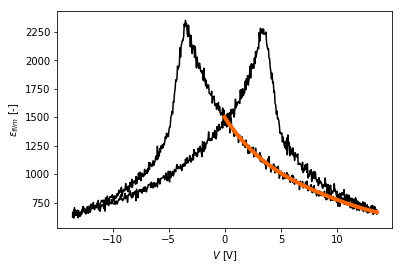

In [7]:
# plot eps-V curve
fig,ax=plt.subplots()
ax.plot(V_for_C,eps_film,'k')
ax.plot(V_for_C[l:2*l+1], V_to_eps(V_for_C[l:2*l+1]),lw=4,color=[1,0.4,0])
ax.set_ylabel(r'$\varepsilon_{film}$ [-]')
ax.set_xlabel(r'$V$ [V]')

The orange line above is the function V_to_eps(), which we will use to describe the dielectric constant of the film.
We choose the lower curve in the above plot since the upper curve includes contributions from motion of domain walls, etc.
We here ignore these contributions to the dielectric constant

## Calculate capacitive contribution from substrate

In [8]:
#function to get capacitive contribution of film
def getCintEx_film(case):
    g,error=scipy.integrate.quad(lambda y: case.get_Ex(0,y), 0,infinite.t[0])
    eps_0 = 8.8541878128*10**-12 # dielectric permitivity of vacuum [F/m]
    c=g*case.single[0].layers[1].eps_x*eps_0
    return c

#function to get capacitive contribution from substrate and air
def capacitive_contribution_of_sub_and_air(tau,eta,N,L,epss):
    # calculate total capacitance of structure
    inf_case = infinite_fourier.multiple_recursive_images([eta,0],[tau],epss,epss,8,180,accuracy_limit=10**-15,hybrid=True)
    c_I = inf_case.get_C() # [F/m]
    pair_case = pair_conformal.multiple_recursive_images([eta,0],[tau],epss,epss,8,20,accuracy_limit=10**-15)
    c_2 = pair_case.get_C() # [F/m]
    c_E=2*c_I*c_2/(c_I+c_2) # [F/m]
    C=L*10**-6*(2*c_E+(N-3)*c_I)
    # calculate film contribution
    g,error=scipy.integrate.quad(lambda y: inf_case.get_Ex(0,y), 0,tau)
    eps_0 = 8.8541878128*10**-12 # dielectric permitivity of vacuum [F/m]
    film_contribution_to_C=(N-1)*L*10**-6*g*epss[1]*eps_0
    return C-film_contribution_to_C # charge in [C]


In [9]:
trail_V_step=(np.max(V)-np.min(V))/10
trail_V = np.arange(np.min(V),np.max(V)+0.5*trail_V_step,trail_V_step)
trail_air_sub_cont = []
for v in tqdm.tqdm(trail_V):
    epss = [eps_air,V_to_eps(v),eps_sub]
    contrib = capacitive_contribution_of_sub_and_air(tau,eta,N,L,epss)
    trail_air_sub_cont.append(contrib)
V_to_capcitive_contrib = np.poly1d(np.polyfit(trail_V, trail_air_sub_cont, 4))

  0%|          | 0/11 [00:00<?, ?it/s]/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
100%|██████████| 11/11 [00:07<00:00,  1.48it/s]


In [10]:
charge_contrib_from_sub_and_air = [0]
for i in range(len(V)-1):
    additional_charge=V_to_capcitive_contrib(np.abs(0.5*(V[1]+V[i+1])))*(V[i+1]-V[i])
    charge_contrib_from_sub_and_air.append(additional_charge+charge_contrib_from_sub_and_air[-1])
charge_contrib_from_sub_and_air=np.array(charge_contrib_from_sub_and_air)

Text(0.5, 0, '$V$ [V]')

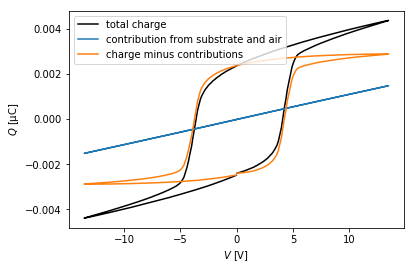

In [11]:
# plot Q-V curve
fig,ax=plt.subplots()
ax.plot(V,Q,'k',label='total charge')
ax.plot(V,charge_contrib_from_sub_and_air*10**6,label='contribution from substrate and air')
Q_corrected = Q-charge_contrib_from_sub_and_air*10**6
ax.plot(V,Q_corrected,label='charge minus contributions')
ax.legend()
ax.set_ylabel(r'$Q$ [µC]')
ax.set_xlabel(r'$V$ [V]')

## Transform to polarization VS electric field

Text(0.5, 0, '$V$ [V]')

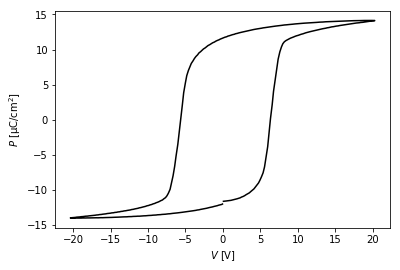

In [12]:
# plot P-E curve
P=Q_corrected/((N-1)*L*t*10**-8) # polarization, µC/cm2
delta_a = 4*np.log(2)*t/np.pi
E = V/(a+delta_a)*10 #kV/cm
fig,ax=plt.subplots()
ax.plot(E,P,'k')
ax.set_ylabel(r'$P$ [µC/cm$^2$]')
ax.set_xlabel(r'$V$ [V]')